# Isaac Ng Yi Ming 1002174 Cohort 1 Statistics assignment

In [1]:
library(ggplot2)
set.seed(42)

People at high risk of sudden cardiac death can be identified using the change in a signal averaged electrocardiogram
(ECG) before and after the prescribed activities. The current method is 80% accurate. The
method was modified, hoping to improve its accuracy. The new method is tested on 50 people and gave
correct results on 46 patients. Is this convincing evidence that the new method is accurate
(a) Set up the hypotheses to test that the accuracy of the new method is better than that of the current
method.
(b) Perform a test of the hypotheses at level α = 0.05. What do you conclude about the accuracy of the
method?
(c) If the new method actually has 90% accuracy, what power does a sample of 50 have to demonstrate
that the new method is better, using a 0.05-level test?
(d) How many patients should be tested in order for this power to be at least 0.75?

# 1a
$H_0$: The new method has success rate $\leq$ 0.8

$H_a$: The new method has success rate > 0.8

# 1b
Assuming that measurements are independent of one another, the distribution of the number of positives is binomially distributed as the number of positives is a count of the number of successful bernoulli trials. 

The number of detections is given by X, where X~Binomial(50, 0.8)

Taking the normal approximation to the binomial distribution, X~Normal(40, 8)

$P(X > 46) = P(Z > \frac{46-40}{8/\sqrt{50}})$


In [2]:
1-pnorm((46-40)/(sqrt(8)/sqrt(50)))

[1] 5.686363e-08

As the P value is less than $\alpha = 0.05$, we reject the alternate hypothesis and conclude that the new method is better. 

# 1c
$Power = 1-\beta$

As power is the probability of false negatives, 

$P(X > 40 | \mu = 0.9)$ = 


In [35]:
crit <- qnorm(0.95, 40, sqrt(8)/sqrt(50))
crit <- ceiling(crit)
1-pnorm((crit-45)/(sqrt(4.5)/sqrt(50)))
print(crit)

[1] 1

[1] 40.65794


# 1d

$n = [\frac{(z_\alpha+z_\beta)\sigma}{\mu-\mu_0}]^2$


In [ ]:
# beta <- 1-0.75 
# alpha <- 0.05
# n <- 50
# p <- 0.9
# mu <- n * p
# sigma <- sqrt(n*p*(1-p))
# nreq <- 


In [4]:
z.alpha <- qnorm(0.05, lower.tail = FALSE)
z.beta <- qnorm(0.25, lower.tail = FALSE)
print(z.alpha+z.beta)



[1] 2.319343


$n = \frac{2.319343*\sqrt{n(0.9\times0.1)}}{n(0.9-0.86)} \\
n = 6.71353 \approx 7$

# 2a

![Screenshot from Excel](img/2a.PNG)
As such, we do not have sufficient evidence to support the null hypothesis, that the digits of pi are not random.

# 2b
$\frac{13717421}{1111111111} = 0.\overline{012345678890}$
Which is clearly nonrandom but will pass a one-sided chi squared test.

# 3
r will not be the same. The coefficient and intercept will also not be related. Regression minimises the errors in the equation $y_i = \beta x_i + \epsilon$. By inverting the y's and x's we are minimising the square error in the horizontal distances to the regression line, as opposed to the vertical line. This has no relation to the vertical distances, in general, when there are more than 2 data points. For proof:


Call:
lm(formula = x ~ y, data = df)

Coefficients:
(Intercept)            y  
    0.53568     -0.06201  


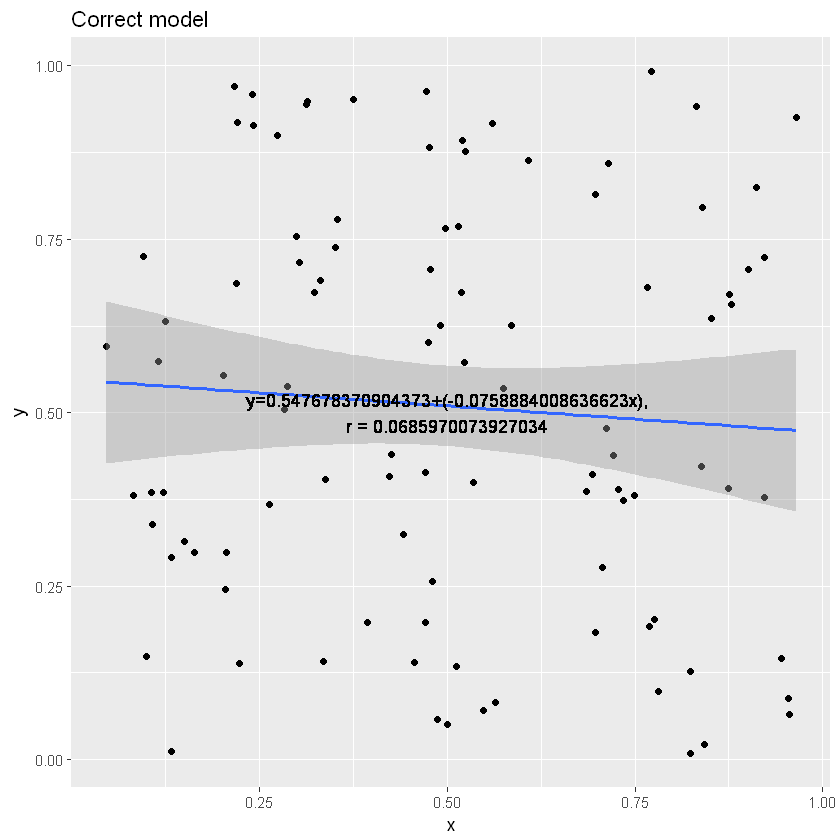

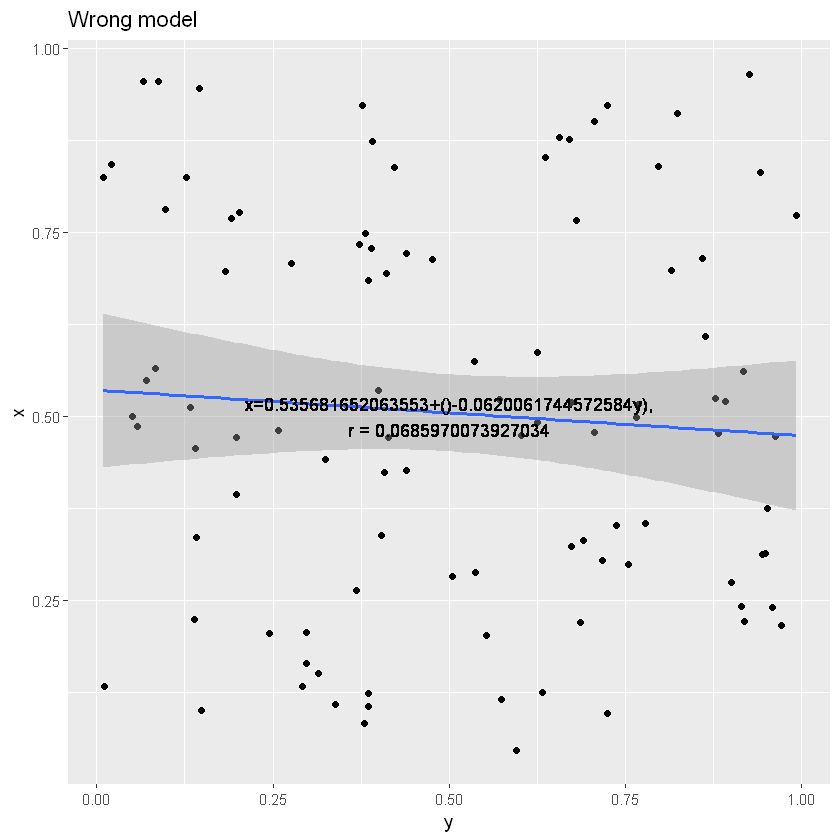

In [204]:
x <- runif(100)
y <- runif(100)
df <- data.frame(x=x, y=y)


correctmodel <- lm(y~x, data = df)

modeleqn <- paste0("y=",correctmodel$coefficients[1],"+(", correctmodel$coefficients[2], "x),\nr = ", sqrt(summary(correctmodel)$r.squared) )
ggplot(df, aes(x, y)) +
  geom_point() +
  stat_smooth(method = "lm", 
              formula = y ~ x) + 
  ggtitle("Correct model") + 
  geom_text(x = 0.5, y = 0.5, label = modeleqn)


#swap x with y
wrongmodel <- lm(x~y, data = df)
wrongmodel
modeleqn <- paste0("x=", wrongmodel$coefficients[1],"+()", wrongmodel$coefficients[2], "y),\nr = ", sqrt(summary(wrongmodel)$r.squared) )
ggplot(df, aes(y, x)) +
  geom_point() +
  stat_smooth(method = "lm", 
              formula = y ~ x) + 
  ggtitle("Wrong model") + 
  geom_text(y = 0.5, x = 0.5, label = modeleqn)


# 4a

![Screenshot from Excel](img/4a.png)

# 4b

In [120]:
s_x <- 7.483314774
s_y <- 0.146617416
x_hat <- 2006
y_hat <- 15.22833333


pred_err <- s_y * sqrt(1+(1/6)+((2020-x_hat)^2)/((6-1)*s_x))
qt(p = c(0.05,0.95), df = (6-2)) * pred_err + y_hat


[1] 14.43729 16.01938

# 4c

In [122]:
confid_err <- s_y * sqrt((1/6)+((2020-x_hat)^2)/((6-1)*s_x))
qt(p = c(0.05,0.95), df = (6-2)) * confid_err + y_hat


[1] 14.50166 15.95501

# 4d

The specific value of $y_{2020}$ can vary more than its own expected value and thus the prediction interval is larger than the confidence interval.

# 5a

![Screenshot from Excel](img/5a.png)


# 5b

![Screenshot from Excel](img/5b.png)

In [137]:
x <- c(1, 0.5, 0.333333333, 0.25, 0.2, 0.166666667, 0.142857143, 0.125, 0.111111111, 0.1)
y <- c(0.4, 0.25, 0.168, 0.1229, 0.09592, 0.078498, 0.066458, 0.057615, 0.050848, 0.045505)
df <- data.frame(x=x, y=y)
model <- lm(y~x, data = df)
results <- summary(model)
# results$coefficients
CI_beta_0 <- results$coefficients[1,1]+results$coefficients[1,2]*qt(p = c(0.025,0.975), df = 8)
CI_beta_1 <- results$coefficients[2,1]+results$coefficients[2,2]*qt(p = c(0.025,0.975), df = 8)
CI_beta_1

[1] 0.3589680 0.4494152

# 5b

$0.35896798776279 < \log_{10}e < 0.449415186070064$

There is sufficient evidence to say that the observed value of $\beta_1$ matches the theoretical value of 0.4343 

In [138]:
CI_beta_0

[1] -0.002615247  0.032991182

# 5c

As 0 is in the $\alpha = 0.05$ CI, we can conclude that the intercept is at 0 with 95% confidence.

This, combined with our previous result, means that we can conclude that $p(x) \approx 1/\log_{10}(x)$

# 6
We construct a two way table and calculate the chi squared test statistic with 1 degree of freedom. The corresponding P-value is less than the confidence level. Thus we reject the null hypothesis, that the probability of getting polio is independent of the treatment 

![Screenshot from Excel](img/6.png)

# 8a

|          | \beta_0 | \beta_1 | \beta_2 | \beta_3 |
|----------|---------|---------|---------|---------|
| Figure 1 | +       | +       | +       | 0       |
| Figure 2 | +       | +       | +       | +       |
| Figure 3 | +       | +       | 0       | +       |
| Figure 4 | +       | -       | -       | +       |

# 8b

one for each dataset?

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x + \hat{\beta}_2z + \epsilon$

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x + \hat{\beta}_2z + \hat{\beta}_3xz + \epsilon$

# 9a

![Screenshot from Excel](img/9.png)

It is better described as a curve.



# 9b
under construction

(Intercept)         age 
  3295.6140    600.3199

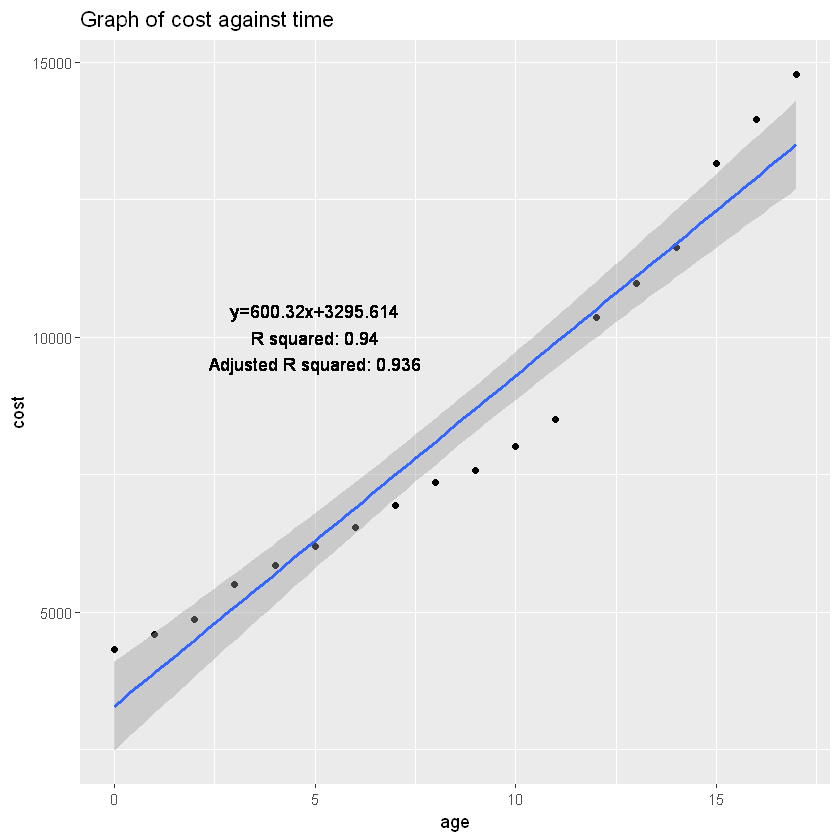

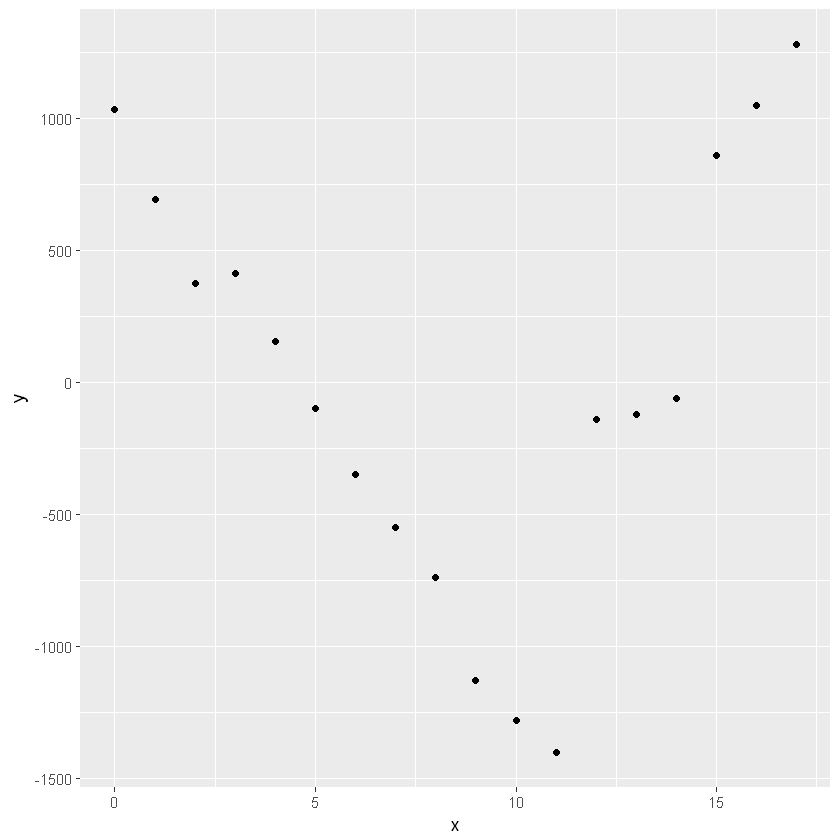

In [217]:
cost <- c(4330, 4590, 4870, 5510, 5850, 6200, 6550, 6950, 7360, 7570, 8020, 8500, 10360, 10980, 11640, 13160, 13950, 14780)
age <- 0:17
df <- data.frame(age = age, cost = cost)
lin_model <- lm(cost~age, data = df)
summary_lin_mod <- summary(lin_model)
modeleqn <- as.character(paste0("y=", round(lin_model$coefficients[2], digits = 3), "x+", round(lin_model$coefficients[1], digits = 3), "\nR squared: ", round(summary_lin_mod$r.squared, 3), "\nAdjusted R squared: ", round(summary_lin_mod$adj.r.squared, 3)))

lin_model$coefficients
ggplot(df, aes(x = age, y = cost)) +
  geom_point() + 
  stat_smooth(method = "lm", 
              formula = y ~ x) +
  ggtitle("Graph of cost against time") +
  geom_text(x = 5, y = 10000, label = modeleqn) #+
#   stat_smooth(method = "lm", 
#               formula = y ~ x**2)

residuals <- data.frame(y = summary_lin_mod$residuals, x = age)
ggplot(residuals, aes(x = x, y = y)) +
  geom_point() +
  geom_line()

In [196]:
summary_lin_mod$r.squared